# Time Series Analysis: Seminar 1

- 6 seminars by Lyubov Gorbunova

- 6 lectures by Boris Demeshev


### Assessment criteria

- **(10%+10%)** HW1 + HW2  
- **(5%+5%)** DataCamp course1 + DataCamp course2
- **(30%)** Group project
- **(40%)** Final Exam  
- **(10%)** Optional DataCamp courses (max 4): 4% + 3% + 2% + 1%

### Deadlines and dates

- **(10%+10%)** 11.02.21 23:00 + 11.03.21 23:00  
- **(5%+5%)** 28.01.21 23:00 + 24.02.21 23:00   
- **(30%)** 28.03.21 23:00  
- **(40%)** 29.03.21  
- **(10%)** 28.03.21 23:00 

### Deadlines and dates

- **28.01.21 23:00** DataCamp course1 (5%)
- **11.02.21 23:00** HW1 (10%)
- **24.02.21 23:00** DataCamp course2 (5%)
- **11.03.21 23:00** HW2 (10%)
- **28.03.21 23:00** Group project (30%)
- **28.03.21 23:00** Optional DataCamp courses (up to 10%)
- **29.03.21**       Final Exam (40%)

telegram chat: 
https://t.me/joinchat/FipRKqd4QQo0z9qP

instructions for DataCamp courses and home assignments:
https://docs.google.com/spreadsheets/d/1sXbu4sHpwO5oxRJGWDElse2O03Vf-a4bReIKBd8x7Gg/edit#gid=0

- Jupyter notebook
- Google Colab
- Deepnote
- ...

#### Cell types

- code cells, to add comments use #
- markdown cells: text, LateX

In [96]:
from numpy.random import uniform
uniform()

0.6928356428624326

In [98]:
import numpy as np
np.random.uniform()

0.8932642485823232

In [102]:
import numpy
numpy.random.uniform()

0.7552097301982819

**from** module **import** function

function(agt)

OR

**import** module **as** mdl

mdl.function(agt)

OR

**import** module 

module.function(agt)

In [101]:
?np.random.uniform()

### Install and import modules, functions

In [ ]:
!pip install sktime

In [1]:
from sktime.datasets import load_airline
from sktime.utils.plotting import plot_series

### Plot a series

In [2]:
y = load_airline()

In [8]:
y.head()

Period
1949-01    112.0
1949-02    118.0
1949-03    132.0
1949-04    129.0
1949-05    121.0
Freq: M, Name: Number of airline passengers, dtype: float64

#### descriptive statistics

In [9]:
y.describe()

count    144.000000
mean     280.298611
std      119.966317
min      104.000000
25%      180.000000
50%      265.500000
75%      360.500000
max      622.000000
Name: Number of airline passengers, dtype: float64

### Plot the data

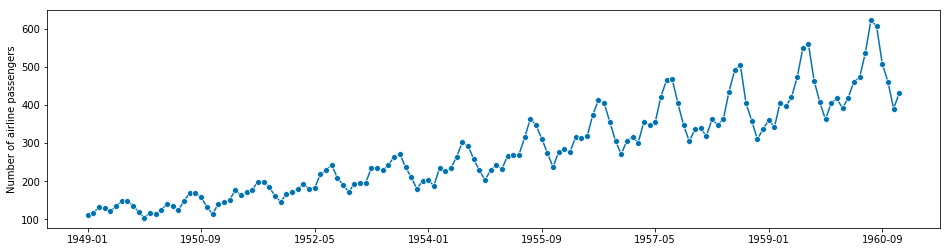

In [5]:
plot_series(y);

### Daily, monthly, quarterly, semi-annual or annual data?

# Forecasting!!!!

### Test and Train split

#### Why do we need it?

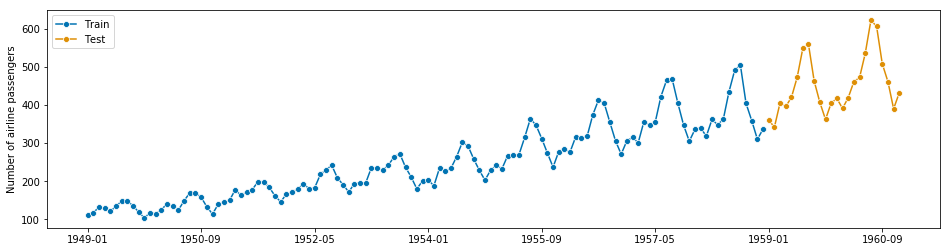

In [4]:
from sktime.forecasting.model_selection import temporal_train_test_split
y_train, y_test = temporal_train_test_split(y, test_size=24)
plot_series(y_train, y_test, labels=['Train', 'Test']);

## What forecasting models do you know?

### Naive forecaster (1)

$\hat{y}_{t+1}=y_t$

In [15]:
from sktime.forecasting.naive import NaiveForecaster
naive_1_forecaster = NaiveForecaster()
naive_1_forecaster.fit(y_train)

NaiveForecaster()

In [13]:
horizon = np.arange(1, 25)
y_pred = naive_1_forecaster.predict(horizon)

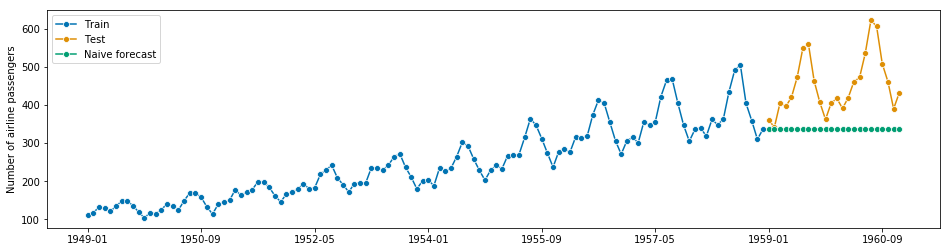

In [14]:
plot_series(y_train, y_test, y_pred, labels=['Train', 'Test', 'Naive forecast 1']);

#### Is it a good forecaster?

### Naive forecaster (2) 

$\hat{y}_{t+1}=y_{t-11}$

In [16]:
naive_2_forecaster = NaiveForecaster(sp=12)
naive_2_forecaster.fit(y_train)

NaiveForecaster(sp=12)

In [17]:
horizon = np.arange(1, 25)
y_pred = naive_2_forecaster.predict(horizon)

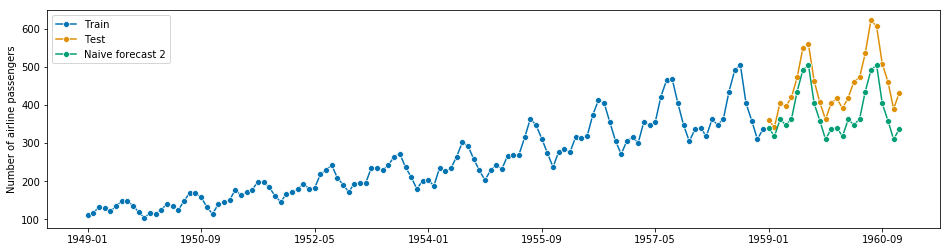

In [18]:
plot_series(y_train, y_test, y_pred, labels=['Train', 'Test', 'Naive forecast 2']);

### ETS(AAA)

Information about a functional form [Forecasting principles and practice](https://otexts.com/fpp3/ets.html).

In [25]:
from sktime.forecasting.ets import AutoETS
ets_aaa_forecaster = AutoETS(error='add', trend='add', seasonal='add', sp=12)
ets_aaa_forecaster.fit(y_train)

AutoETS(seasonal='add', sp=12, trend='add')

In [30]:
horizon = np.arange(1, 25)
y_pred = ets_aaa_forecaster.predict(horizon)

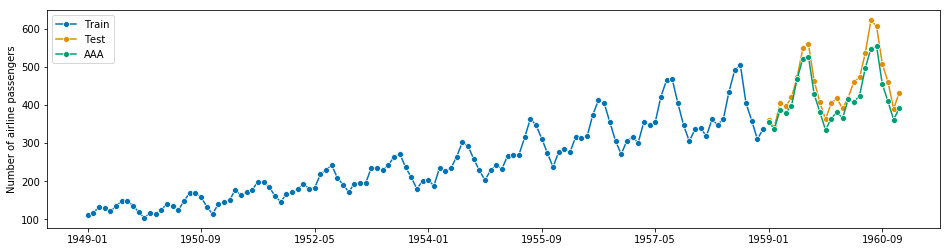

In [92]:
plot_series(y_train, y_test, y_pred, labels=['Train', 'Test', 'AAA']);

In [118]:
ets_aaa_forecaster.fit(y)
ets_aaa_forecaster.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      ETS Results                                       
========================================================================================
Dep. Variable:     Number of airline passengers   No. Observations:                  144
Model:                                 ETS(AAA)   Log Likelihood                -565.076
Date:                          Thu, 21 Jan 2021   AIC                           1166.153
Time:                                  17:35:16   BIC                           1219.609
Sample:                              01-31-1949   HQIC                          1187.875
                                   - 12-31-1960   Scale                          149.966
Covariance Type:                         approx                                         
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
smoothing_level         0.2521      0.042      5.957      0.000       0.169       0.335
smoothing_trend      2.521e-05        nan        nan        nan         nan         nan
smoothing_seasonal      0.7478      0.059     12.635      0.000       0.632       0.864
initial_level         104.9960      6.393     16.425      0.000      92.467     117.525
initial_trend           2.5894      0.326      7.940      0.000       1.950       3.229
initial_seasonal.0      1.5999     10.211      0.157      0.875     -18.413      21.612
initial_seasonal.1    -14.8806     10.221     -1.456      0.145     -34.912       5.151
initial_seasonal.2     -0.3617     10.172     -0.036      0.972     -20.299      19.575
initial_seasonal.3     18.5223     10.167      1.822      0.068      -1.405      38.449
initial_seasonal.4     32.6655     10.166      3.213      0.001      12.740      52.591
initial_seasonal.5     34.9692     10.164      3.440      0.001      15.048      54.891
initial_seasonal.6     22.6347     10.155      2.229      0.026       2.731      42.538
initial_seasonal.7      8.4639     10.155      0.833      0.405     -11.440      28.368
initial_seasonal.8     17.2897     10.157      1.702      0.089      -2.617      37.197
initial_seasonal.9     22.6028     10.175      2.222      0.026       2.661      42.544
initial_seasonal.10    10.1864     10.162      1.002      0.316      -9.731      30.104
initial_seasonal.11          0     10.189          0      1.000     -19.970      19.970
===================================================================================
Ljung-Box (Q):                      138.13   Jarque-Bera (JB):                 2.42
Prob(Q):                              0.00   Prob(JB):                         0.30
Heteroskedasticity (H):               4.67   Skew:                             0.22
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.46
===================================================================================

Warnings:
[1] Covariance matrix calculated using numerical (complex-step) differentiation.
[2] Covariance matrix is singular or near-singular, with condition number 8.44e+15. Standard errors may be unstable.
"""

## Task 1

1. Choose a time series and a forecasting horizon
2. Naive forecast (1)
3. Naive forecast (2)
4. ETS (AAA) model 

### Alternative 1: yahoo finance

In [40]:
import yfinance as yf

In [86]:
prices = yf.download(['KO','PEP','AAPL'],'2019-06-20','2020-09-20')

[*********************100%***********************]  3 of 3 downloaded


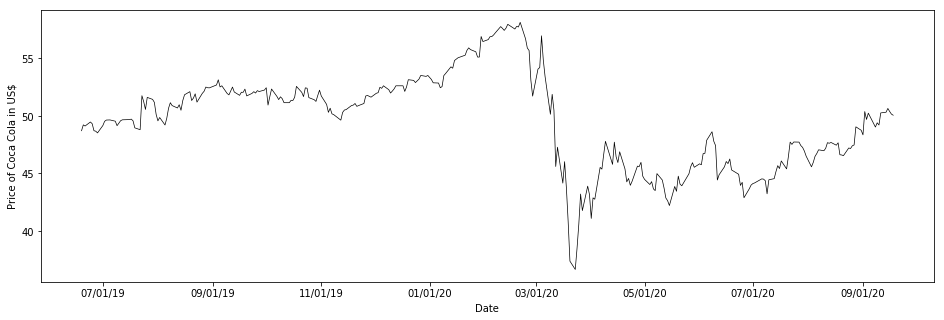

In [114]:
import matplotlib.pyplot as plt
import matplotlib

plt.figure(figsize=(16, 5))
plt.plot(prices['Adj Close']['KO'], color='black', linewidth=0.7, label="Coca Cola")
plt.gca().xaxis.set_major_formatter(matplotlib.dates.DateFormatter("%D"))

plt.ylabel('Price of Coca Cola in US$')

plt.xlabel('Date')
plt.savefig('test2png.png')

### Alternative 2: Monthly anti-diabetic drug sales in Australia from 1992 to 2008

In [105]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/a10.csv', parse_dates=['date'], index_col='date')

(<Figure size 1152x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x9433d369e8>)

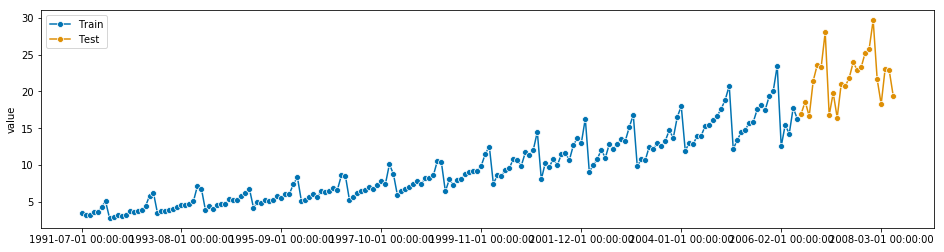

In [116]:
y_train, y_test = temporal_train_test_split(df['value'], test_size=24)
plot_series(y_train, y_test, labels=['Train', 'Test'])

In [ ]:
naive_1_forecaster = NaiveForecaster()
naive_1_forecaster.fit(y_train)